In [24]:
import cv2
import csv
import pandas as pd
import matplotlib.pyplot as plt


In [25]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('/content/keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)



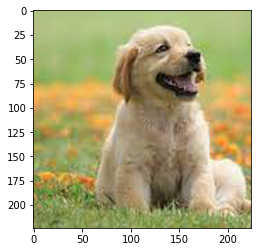

In [31]:
# Replace this with the path to your image
image = Image.open('/content/1.jpg')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
plt.imshow(image)

In [23]:

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
#print(prediction)

answer_ = prediction[0]
# element 0 indicates red panda
# element 1 indicates an animal which is not red panda
# element 2 indicates no animal

max_pred = max(answer_)
#print(max_pred)

if (answer_[0] == max_pred):
  print("Red Panda")

elif(answer_[1] == max_pred):
  print("Not Red Panda but an animal")

else:
  print("No animal detected")

print("the percentage of confidenc is ",max_pred)

Not Red Panda but an animal
the percentage of confidenc is  0.99965596
